# Сначала построим процесс по перому методу ( для примера возьмем скользящие среднее )

In [298]:
import matplotlib as plt 
import numpy as np 
import pandas as pd
import seaborn as sns
import math
import random
import pylab
%matplotlib inline
    

In [301]:
a = []

for i in range(0,1030):
    a.append(random.gauss(0,1))

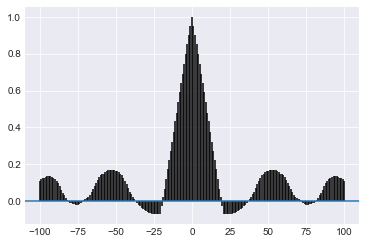

In [297]:
res=[]
j=0
while j+21<len(a):
    res.append(sum(a[j:j+21]))
    j+=1
g=plt.pyplot.xcorr(res,res,maxlags=100,normed = True) 

In [133]:
new_g = (g[0][(g[0] < 22)*(g[0] > -22)], g[1][(g[0] < 22)*(g[0] > -22)])
new_g[1]

array([-0.09220473, -0.05207452, -0.00756681,  0.03531656,  0.08238548,
        0.13067051,  0.17743196,  0.2299333 ,  0.28308443,  0.33702128,
        0.38928697,  0.44478371,  0.50051042,  0.56030672,  0.62015472,
        0.67532931,  0.73280231,  0.78886439,  0.84389102,  0.89638341,
        0.94959784,  1.        ,  0.94959784,  0.89638341,  0.84389102,
        0.78886439,  0.73280231,  0.67532931,  0.62015472,  0.56030672,
        0.50051042,  0.44478371,  0.38928697,  0.33702128,  0.28308443,
        0.2299333 ,  0.17743196,  0.13067051,  0.08238548,  0.03531656,
       -0.00756681, -0.05207452, -0.09220473])

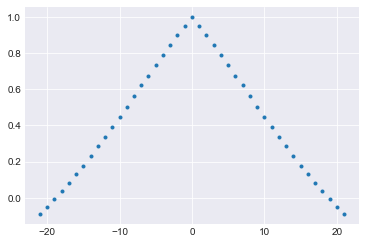

In [134]:
#Визуализация исправленного треугольника от шума

pylab.plot(new_g[0],new_g[1],".")
pylab.show()

In [135]:
#НАЙДЕМ ВЕСА


In [136]:
new_g[1]

array([-0.09220473, -0.05207452, -0.00756681,  0.03531656,  0.08238548,
        0.13067051,  0.17743196,  0.2299333 ,  0.28308443,  0.33702128,
        0.38928697,  0.44478371,  0.50051042,  0.56030672,  0.62015472,
        0.67532931,  0.73280231,  0.78886439,  0.84389102,  0.89638341,
        0.94959784,  1.        ,  0.94959784,  0.89638341,  0.84389102,
        0.78886439,  0.73280231,  0.67532931,  0.62015472,  0.56030672,
        0.50051042,  0.44478371,  0.38928697,  0.33702128,  0.28308443,
        0.2299333 ,  0.17743196,  0.13067051,  0.08238548,  0.03531656,
       -0.00756681, -0.05207452, -0.09220473])

In [137]:
weight = []

N = 21 #Изменение от -21 до 21
for n in range(-N,N+1):
    s=0
    l=0
    for i in range(-N,N+1):
#         s+=new_g[1][i]*(math.cos((2*math.pi*n*i)/(2*N+1))-1j*math.sin((2*math.pi*n*i)/(2*N+1)))
#         s+=new_g[1][i]*(math.cos((2*math.pi*n*i)/(2*N+1)))
        s+=new_g[1][l]*(math.cos((2*math.pi*n*i)/(2*N+1)))
        l+=1
    weight.append(s)

In [138]:
weight # Веса

[0.023836686042992387,
 0.015943625888987165,
 0.026612115030111985,
 0.030397687342596756,
 0.03125030626625361,
 0.02477976984140748,
 0.032703866700868375,
 0.0188663150345438,
 0.06223840918219772,
 0.022816780116484275,
 0.08304515045080021,
 0.02705766933142867,
 0.09491345988619831,
 0.02513920842930034,
 0.1910862002617304,
 0.04409312380313364,
 0.3294786436815839,
 0.06033614870092928,
 0.9395467087820791,
 0.38391991655401725,
 10.006029940670688,
 18.051816536003308,
 10.006029940670688,
 0.38391991655401725,
 0.9395467087820791,
 0.06033614870092928,
 0.3294786436815839,
 0.04409312380313364,
 0.1910862002617304,
 0.02513920842930034,
 0.09491345988619831,
 0.02705766933142867,
 0.08304515045080021,
 0.022816780116484275,
 0.06223840918219772,
 0.0188663150345438,
 0.032703866700868375,
 0.02477976984140748,
 0.03125030626625361,
 0.030397687342596756,
 0.026612115030111985,
 0.015943625888987165,
 0.023836686042992387]

In [139]:
# Построим траекторию процесса Извлечем корень из спектральной плотности 
new_weight = np.array(weight) ** (1/2)

In [140]:
new_weight

array([0.15439134, 0.12626807, 0.1631322 , 0.17434933, 0.17677756,
       0.15741591, 0.1808421 , 0.13735471, 0.24947627, 0.15105224,
       0.28817555, 0.16449216, 0.30808028, 0.15855349, 0.43713408,
       0.20998363, 0.5740023 , 0.24563418, 0.96930218, 0.61961271,
       3.16323093, 4.24874294, 3.16323093, 0.61961271, 0.96930218,
       0.24563418, 0.5740023 , 0.20998363, 0.43713408, 0.15855349,
       0.30808028, 0.16449216, 0.28817555, 0.15105224, 0.24947627,
       0.13735471, 0.1808421 , 0.15741591, 0.17677756, 0.17434933,
       0.1631322 , 0.12626807, 0.15439134])

In [141]:
alpha = []
for i in range(0,100):
    alpha.append(random.gauss(0,1)) #Сгернерим гаусса

In [142]:
def ksi(t):
    result=[]
    l=0
    for i in range(-N,N+1):
        result.append(1/((2*N+1)**(1/2))*(math.cos((2*math.pi*t*i)/(2*N+1)))*new_weight[l]*alpha[l])
        l+=1
    return sum(result)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: numpy.arange
  if sys.path[0] == '':


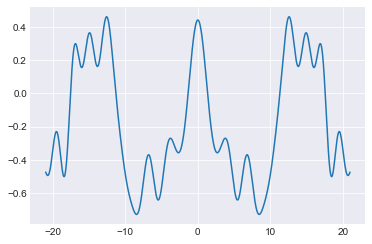

In [143]:
#генерация одной траектории 

from matplotlib import mlab

xmin = -N
xmax = N

# Шаг между точками
dx = 0.01

# Создадим список координат по оси X на отрезке [-xmin; xmax], включая концы
xlist = mlab.frange (xmin, xmax, dx)

# Вычислим значение функции в заданных точках
ylist = [ksi(x) for x in xlist]

# !!! Нарисуем одномерный график
pylab.plot (xlist, ylist)

# !!! Покажем окно с нарисованным графиком
pylab.show()

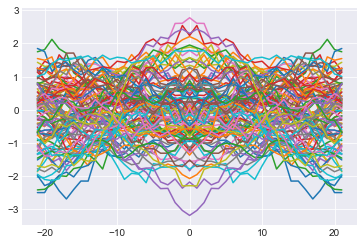

In [205]:
for i in range(100):
    alpha = [random.gauss(0,1) for i in range(0,2*N+1)]
    arg=[ksi(t) for t in new_g[0]]
    pylab.plot(new_g[0],arg)
pylab.show()

In [244]:
# Для третьей корреляционной функции моеего варианта, чтобы рассчитать спектальную плотность, нужно найти такую S, что k = S * S
#В данном случае нужно d^2 / 2 и взять из этого корень, тогда при светки получим правильную корреляционную функцию

# Можно проверить с помощью вольфрама int from -inf to inf exp((-2x^2+2tx-t^2)/(2*35^2)) dx


k = [math.exp((-1*(m**2)/(2*((35.35**2))))) for m in range(-300,301)]
x = [i for i in range(-300,301)]

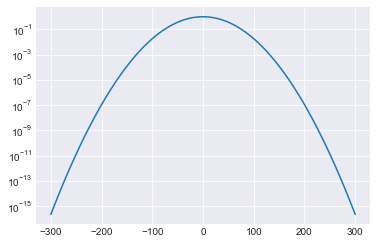

In [245]:
pylab.semilogy(x,k)

In [ ]:
pylab.semilogy(x,k)


In [304]:
# Берем 300 значений S(n) спектальной плотности и построим процесс приращений с помощью скользящего среднего 
# n(i) = Sum(-N,N) Si * Ek-i, где E i гаусс на (0,1)

alpha = []

for i in range(0,1200):
    alpha.append(random.gauss(0,1))


In [339]:
# Строим процесс приращений
s = 0
out = []
for i in range(0,501):
    s=0
    for j in range(0,601):
        s+=alpha[i+j]*k[j]
    out.append(s)

# Теперь построим траекторию конечного процесса

In [358]:
res = []
res.append(out[0])
for k in range(1,501):
    buff = 0
    for l in range(0,k+1):
        buff+=out[l]
    res.append(buff)

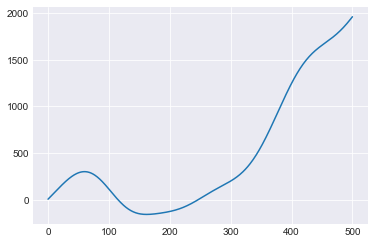

In [365]:
pylab.plot(res)

In [373]:
# Теперь нагенерим 5 тыс таких траеткорий


500

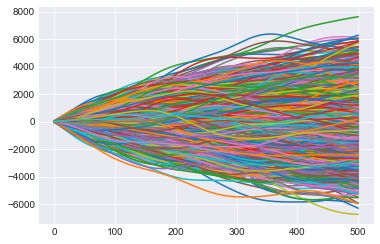

In [535]:
tracks = []
time_wins = []

for n in range(0,5000):
    alpha = [random.gauss(0,1) for u in range(0,1201)]
    k = [math.exp((-1*(m**2)/(2*((35.35**2))))) for m in range(-300,301)]
    s = 0
    out = []
    for i in range(0,501):
        s=0
        for j in range(0,601):
            s+=alpha[i+j]*k[j]
        out.append(s)
    res = []
    res.append(out[0])
    for m in range(1,501):
        buff = 0
        for l in range(0,m+1):
            buff+=out[l]
        res.append(buff)
    tracks.append(res)
    count = 0
    for e in range(len(res)):
        if res[e] > 0:
            count+=1
    time_wins.append(count/len(res))
    pylab.plot(tracks[n])
pylab.show()

In [536]:
len(tracks)

5000

In [ ]:
#Для корреляционной функции 1 - |x/50| - сверточный квадрат будет прямоугольный импульс с постоянным значением 1/sqrt(50) 

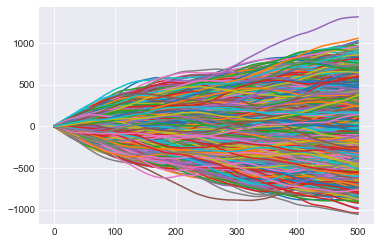

In [540]:
tracks2 = []
time_wins2 = []

for n in range(0,5000):
    alpha2 = [random.gauss(0,1) for u in range(0,1201)]
    k2 = [0 for m in range(-300,301)]
    for q in range(250,351):
        k2.insert(q,1/(50**(1/2)))
        del k2[q+1]
    s = 0
    out2 = []
    for i in range(0,501):
        s=0
        for j in range(0,601):
            s+=alpha2[i+j]*k2[j]
        out2.append(s)
    res2 = []
    res2.append(out2[0])
    for m in range(1,501):
        buff = 0
        for l in range(0,m+1):
            buff+=out2[l]
        res2.append(buff)
    tracks2.append(res2)
    count = 0
    for e in range(len(res2)):
        if res2[e] > 0:
            count+=1
    time_wins2.append(count/len(res2))
    pylab.plot(tracks2[n])
pylab.show()

(array([1176.,  364.,  358.,  321.,  293.,  278.,  334.,  322.,  342.,
        1213.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

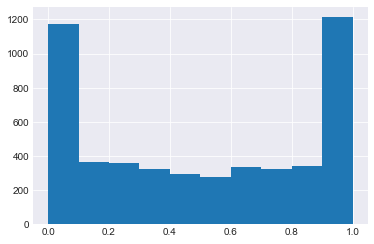

In [453]:
pylab.hist(time_wins2)

In [433]:
#buff_k = [0 for m in range(-300,301)]
#for q in range(250,351):
#    buff_k.insert(q,1/(50**(1/2)))
#    del buff_k[q+1]
    

In [461]:
#pylab.plot(buff_k)


(array([1226.,  329.,  343.,  291.,  319.,  305.,  302.,  332.,  340.,
        1214.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

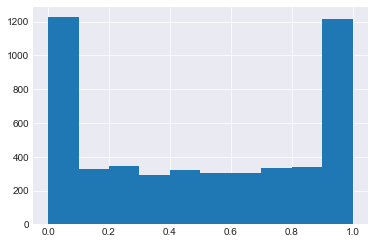

In [460]:
pylab.hist(time_wins)


In [519]:
from scipy.stats import ks_2samp

ks_2samp(time_wins,time_wins2)

Ks_2sampResult(statistic=0.03479304139172165, pvalue=0.00455984305139057)

In [511]:
k_1 = [math.exp((-1*(m**2)/(2*((35.35**2))))) for m in range(-300,301)]
x_1 = [i for i in range(-300,301)]

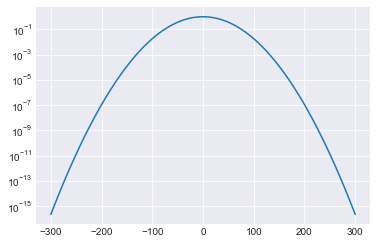

In [513]:
pylab.semilogy(x_1,k_1)

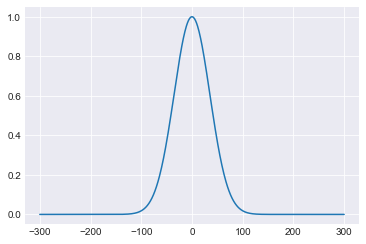

In [514]:
pylab.plot(x_1,k_1)

In [516]:
k2_ = [0 for m in range(-300,301)]
for q in range(250,351):
    k2_.insert(q,1/(50**(1/2)))
    del k2_[q+1]

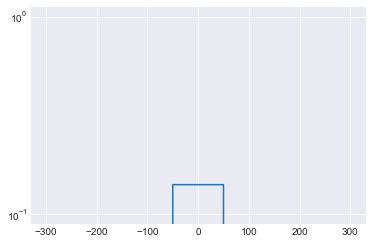

In [518]:
pylab.semilogy(x_1,k2_)

In [523]:
c_P = 0

for ex in range(0,501):
    if time_wins[ex] < 0.05:
        c_P+=1
c_P/501

0.21956087824351297

In [521]:
len(time_wins)

5001

In [524]:
c_ = 0

for tx in range(0,501):
    if time_wins2[tx] < 0.05:
        c_+=1
c_/501

0.1996007984031936